In [4]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing  import LabelEncoder

In [5]:
#import dataset
df = pd.read_excel('Data_Train.xlsx')
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


# Data Pre-processing

In [6]:
df.Location.unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [7]:
df.Fuel_Type.unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [8]:
df.Transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [9]:
df.Owner_Type.unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [10]:
lb = LabelEncoder()
lb.fit(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur','Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'])
df.Location = lb.transform(df.Location)

In [11]:
lb.fit(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'])
df.Fuel_Type = lb.transform(df.Fuel_Type)

In [12]:
lb.fit(['Manual', 'Automatic'])
df.Transmission = lb.transform(df.Transmission)

In [13]:
lb.fit(['First', 'Second', 'Fourth & Above', 'Third'])
df.Owner_Type= lb.transform(df.Owner_Type)

In [14]:
df.Engine = pd.to_numeric(df.Engine.str.replace('[^\d.]', ''), errors='coerce')

In [15]:
df.Power = pd.to_numeric(df.Power.str.replace('[^\d.]', ''), errors='coerce')

In [16]:
df.Mileage =  pd.to_numeric(df.Mileage.str.replace('[^\d.]', ''), errors='coerce')

In [17]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,9,2010,72000,0,1,0,26.60,998.0,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,10,2015,41000,1,1,0,19.67,1582.0,126.20,5.0,NaN,12.50
2,Honda Jazz V,2,2011,46000,4,1,0,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,2,2012,87000,1,1,0,20.77,1248.0,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,3,2013,40670,1,0,2,15.20,1968.0,140.80,5.0,NaN,17.74


In [18]:
#drop new price list
cdf = df.drop('New_Price',1)

In [19]:
#checking null values
cdf.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
Price                  0
dtype: int64

In [20]:
cdf.Mileage = cdf.Mileage.fillna(cdf.Mileage.mean())

In [21]:
cdf.Engine = cdf.Engine.fillna(cdf.Engine.mean())

In [22]:
cdf.Seats = cdf.Seats.fillna(cdf.Seats.median())

In [23]:
cdf.Power = cdf.Power.fillna(cdf.Power.mean())

In [24]:
#processed dataset
cdf.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,9,2010,72000,0,1,0,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,10,2015,41000,1,1,0,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,2,2011,46000,4,1,0,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,2,2012,87000,1,1,0,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,3,2013,40670,1,0,2,15.20,1968.0,140.80,5.0,17.74


# Data Visualization 

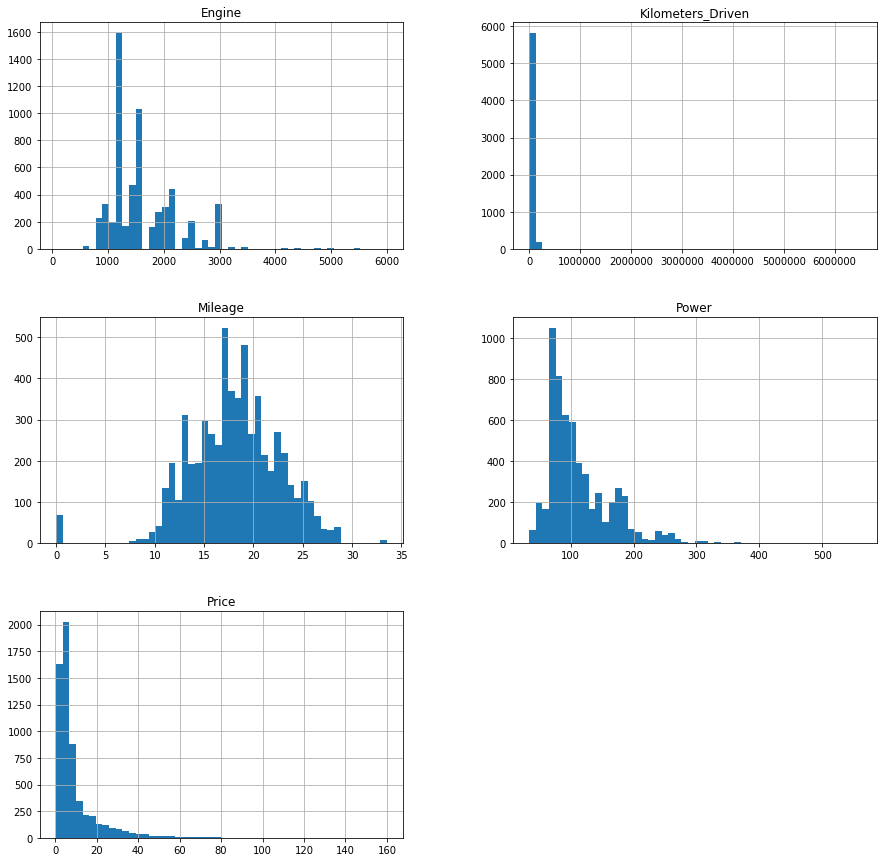

In [25]:
viz=df[['Mileage','Price','Engine','Power','Kilometers_Driven']]
viz.hist(bins=50, figsize=(15,15))
plt.show()

In [26]:
cm = cdf.corr()

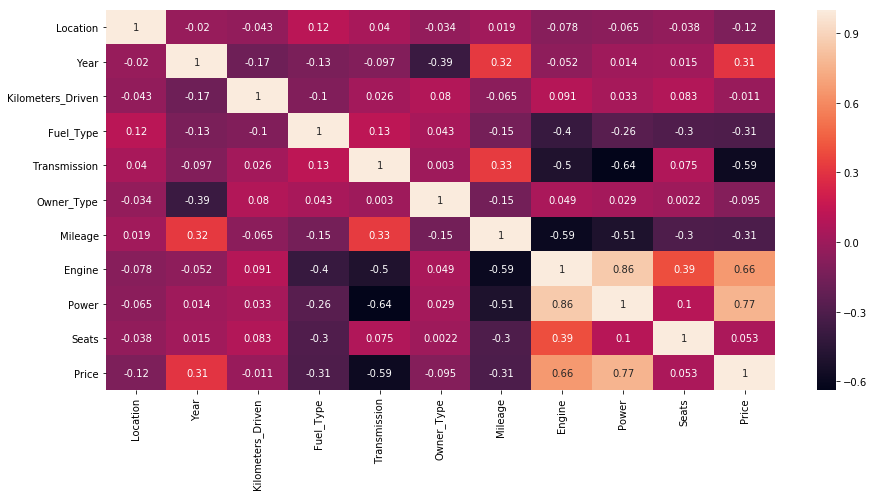

In [27]:
plt.figure(figsize = (15,7))
sns.heatmap(cm, annot=True)
plt.show()

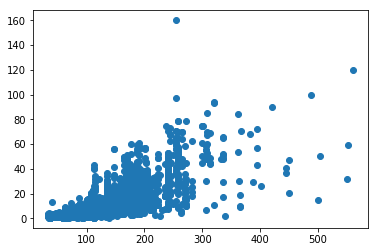

In [28]:
plt.scatter(cdf.Power,cdf.Price)

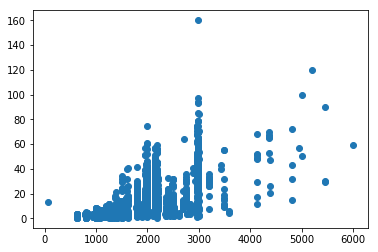

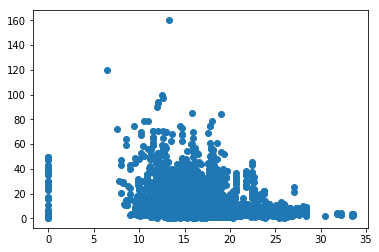

In [29]:
plt.Figure()
plt.scatter(cdf.Engine,cdf.Price)
plt.show()
plt.Figure()
plt.scatter(cdf.Mileage,cdf.Price)

# Regrssion Model

In [30]:
X = cdf[['Location','Year','Kilometers_Driven','Fuel_Type','Transmission','Mileage','Engine','Power']].values
Y = cdf.Price.values

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 10)

In [39]:
from sklearn.ensemble import RandomForestRegressor

In [34]:
re = RandomForestRegressor(n_estimators=10,criterion='mae',random_state=0)

In [35]:
re.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [36]:
re.score(X_test,y_test)

0.881889914879849

In [37]:
re.fit(X,Y)

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [38]:
from sklearn.ensemble import GradientBoostingRegressor

In [39]:
r = GradientBoostingRegressor(loss ='ls',criterion='mae',max_depth=5,random_state=0)
r.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='mae', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=0,
             subsample=1.0, verbose=0, warm_start=False)

In [40]:
r.score(X_test,y_test)

0.8739110820514119

In [41]:
r.score(X_train,y_train)

0.9490091081483484

In [42]:
reg = GradientBoostingRegressor(loss ='ls',criterion='mae',max_depth=5,random_state=0)
reg.fit(X,Y)

GradientBoostingRegressor(alpha=0.9, criterion='mae', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=0,
             subsample=1.0, verbose=0, warm_start=False)

In [46]:
from sklearn.metrics import mean_squared_log_error,mean_squared_error

In [45]:
MSLE = mean_squared_log_error(y_test ,re.predict(X_test) )
RMSLE = math.sqrt(MSLE)
print("Root Mean Squared Log error: {}".format(RMSLE))

Root Mean Squared Log error: 0.10676202096046701


In [48]:
RMSE = math.sqrt(mean_squared_error(y_test ,re.predict(X_test) ))
print("Root Mean Squared error: {}".format(RMSE))

Root Mean Squared error: 1.5650653536023702


In [69]:
#import test data set
tdf = pd.read_excel('Data_Test.xlsx')
tdf.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [70]:
lb = LabelEncoder()
lb.fit(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur','Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'])
tdf.Location = lb.transform(tdf.Location)

In [71]:
lb.fit(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'])
tdf.Fuel_Type = lb.transform(tdf.Fuel_Type)

In [72]:
lb.fit(['Manual', 'Automatic'])
tdf.Transmission = lb.transform(tdf.Transmission)

In [73]:
lb.fit(['First', 'Second', 'Fourth & Above', 'Third'])
tdf.Owner_Type= lb.transform(tdf.Owner_Type)

In [74]:
tdf.Engine = pd.to_numeric(tdf.Engine.str.replace('[^\d.]', ''), errors='coerce')

In [75]:
tdf.Power = pd.to_numeric(tdf.Power.str.replace('[^\d.]', ''), errors='coerce')

In [76]:
tdf.Mileage =  pd.to_numeric(tdf.Mileage.str.replace('[^\d.]', ''), errors='coerce')


In [77]:
tdf.Mileage = tdf.Mileage.fillna(tdf.Mileage.mean())
tdf.Engine = tdf.Engine.fillna(tdf.Engine.mean())
tdf.Seats = tdf.Seats.fillna(tdf.Seats.median())
tdf.Power = tdf.Power.fillna(tdf.Power.mean())

In [78]:

tdf.head()


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,4,2014,40929,0,1,0,32.26,998.0,58.20000,4.0,NaN
1,Maruti Alto 800 2016-2019 LXI,3,2013,54493,4,1,2,24.70,796.0,47.30000,5.0,NaN
2,Toyota Innova Crysta Touring Sport 2.4 MT,9,2017,34000,1,1,0,13.68,2393.0,147.80000,7.0,25.27 Lakh
3,Toyota Etios Liva GD,5,2012,139000,1,1,0,23.59,1364.0,110.38042,5.0,NaN
4,Hyundai i20 Magna,9,2014,29000,4,1,0,18.50,1197.0,82.85000,5.0,NaN


In [79]:
x = tdf[['Location','Year','Kilometers_Driven','Fuel_Type','Transmission','Mileage','Engine','Power']].values

In [80]:
arr = reg.predict(x)

In [81]:
prediction = pd.DataFrame(arr,columns=['Price'])
prediction = prediction.round(2)

In [82]:
prediction.head()

,Price
0,3.41
1,3.00
2,16.08
3,4.60
4,4.08


In [57]:
prediction.Price.to_excel(r'C:\Users\SAIBAL\Desktop\hackathon\Participants_Data_Used_Cars\Participants_Data_Used_Cars\Result.xlsx')

In [83]:
arr1 = re.predict(x)

In [84]:
prediction1 = pd.DataFrame(arr,columns=['Price'])
prediction1 = prediction.round(2)
prediction1.head()

,Price
0,3.41
1,3.00
2,16.08
3,4.60
4,4.08


In [60]:
prediction1.Price.to_excel(r'C:\Users\SAIBAL\Desktop\hackathon\Participants_Data_Used_Cars\Participants_Data_Used_Cars\Result3.xlsx')